In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv(r"C:\Users\satya\Downloads\Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [28]:
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [30]:
#df.info

In [31]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [32]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [33]:
array=df.values

In [34]:
array

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)

In [35]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [36]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [37]:
dbscan=DBSCAN()

In [38]:
type(X)

numpy.ndarray

In [39]:
import scipy.cluster.hierarchy as sch

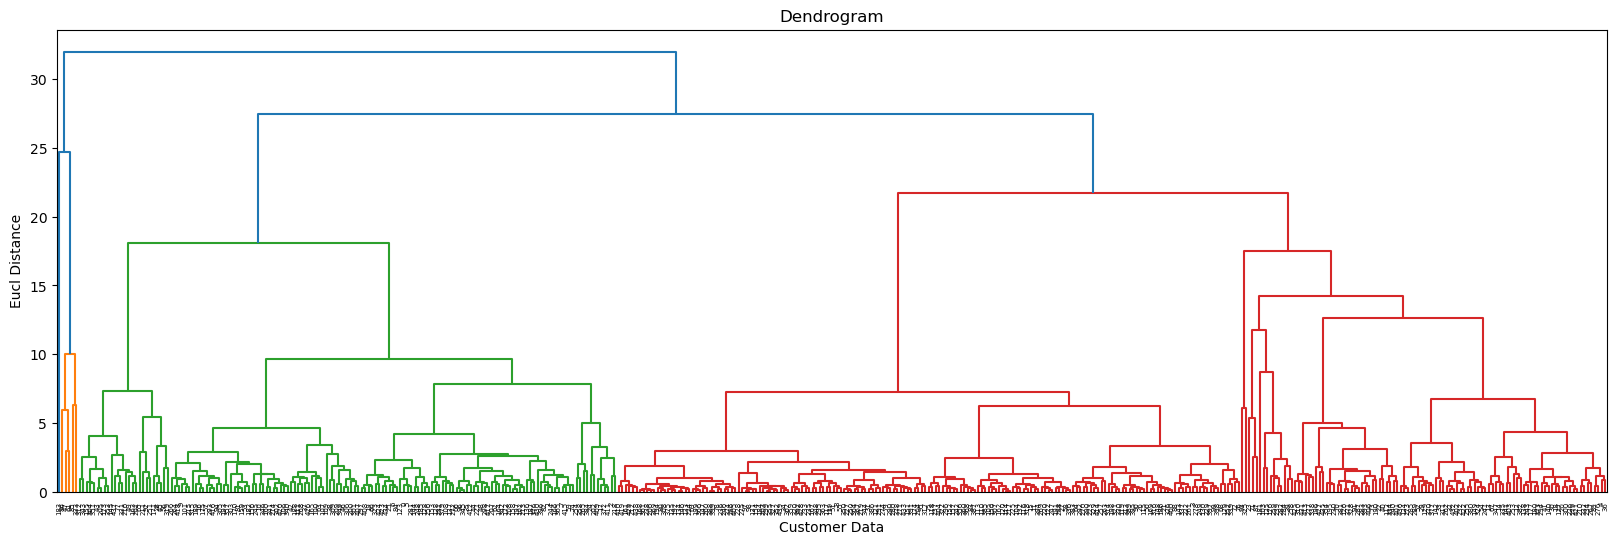

In [40]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer Data')
plt.ylabel('Eucl Distance')
plt.show()

In [41]:
a=len(set(dendo['color_list']))
a

4

In [42]:
a-1

3

In [43]:
from sklearn.cluster import AgglomerativeClustering as ac

In [44]:
group=ac(n_clusters=3)
group.fit_predict(X)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [45]:
cluster=group.fit_predict(X)
cluster.shape

(440,)

In [46]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [47]:
from sklearn.metrics import silhouette_score as ss
ss(X,cluster)

0.2646091480214908

## K-Means

In [48]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [49]:
from sklearn.cluster import KMeans as km
wcss=[]
for i in range(2,11):
    kmeans=km(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [50]:
wcss

[1956.1242775222677,
 1608.4311488289443,
 1317.8383605390704,
 1058.7712532570085,
 915.7412597498405,
 825.400252021833,
 737.3862033362681,
 661.4495846389704,
 605.9151092090293]

In [52]:
#group_num=pd.DataFrame(cluster,columns=['Group'])
#group_num

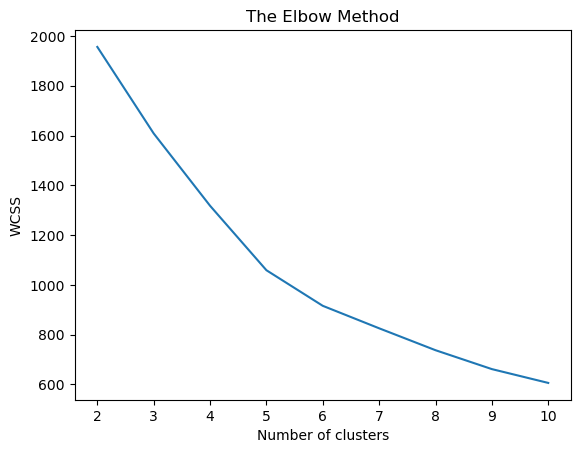

In [53]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
model=km(n_clusters=4,random_state=711)
groups=model.fit_predict(X)

In [55]:
groups.shape

(440,)

In [56]:
groups

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 1, 1, 3, 0, 1, 1, 1, 3, 1, 0, 1, 3,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 3, 3, 2,
       1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 3, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

In [57]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [58]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [59]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [61]:
ss(X,groups)

0.34847138657014315